Alya Safadella P. A <br>
221910892 <br>
3SI1 <br>
09T0VJN

In [1]:
library(psych)
library(corrplot)
library(psych)
library(ggplot2)
library(car)

corrplot 0.88 loaded


Attaching package: 'ggplot2'


The following objects are masked from 'package:psych':

    %+%, alpha


Loading required package: carData


Attaching package: 'car'


The following object is masked from 'package:psych':

    logit




In [2]:
# Dataset
url <- "https://raw.githubusercontent.com/housecricket/data/main/efa/sample1.csv"

data_survey <- read.csv(url, sep = ",")

In [3]:
head(data_survey)

,ID,KM1,KM2,KM3,QC1,QC2,QC3,CT1,CT2,CT3,PC1,PC2,PC3,QD
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,5,5,5,5,2,1,1,3,1,4,1,3,4
2,2,3,3,3,4,5,3,4,5,4,2,2,2,4
3,3,2,2,2,2,2,1,3,3,3,4,3,5,2
4,4,4,3,3,4,3,4,4,4,4,1,1,3,3
5,5,4,4,4,2,3,4,4,4,4,3,3,5,4
6,6,1,1,1,2,5,3,5,5,5,4,3,5,3


In [4]:
describe(data_survey)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ID,1,259,130.000000,74.911058,130,130.000000,96.3690,1,259,258,0.0000000,-1.2139083,4.65474668
KM1,2,259,3.312741,1.290496,3,3.387560,1.4826,1,5,4,-0.2695616,-0.8894511,0.08018751
KM2,3,259,3.362934,1.369496,3,3.449761,1.4826,1,5,4,-0.3536081,-1.0192345,0.08509636
KM3,4,259,3.397683,1.308942,3,3.492823,1.4826,1,5,4,-0.3764581,-0.9048830,0.08133367
QC1,5,259,3.776062,1.348286,4,3.961722,1.4826,1,5,4,-0.9325626,-0.5021406,0.08377840
QC2,6,259,3.409266,1.172385,3,3.483254,1.4826,1,5,4,-0.2998713,-0.6226972,0.07284848
QC3,7,259,3.339768,1.232789,3,3.421053,1.4826,1,5,4,-0.2675501,-0.8144779,0.07660179
CT1,8,259,3.687259,1.120057,4,3.803828,1.4826,1,5,4,-0.5369267,-0.2422238,0.06959694
CT2,9,259,3.733591,1.075841,4,3.842105,1.4826,1,5,4,-0.5563827,-0.2063447,0.06684949


In [5]:
dat <- data_survey[ , -1] 
head(dat)

,KM1,KM2,KM3,QC1,QC2,QC3,CT1,CT2,CT3,PC1,PC2,PC3,QD
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,5,5,5,5,2,1,1,3,1,4,1,3,4
2,3,3,3,4,5,3,4,5,4,2,2,2,4
3,2,2,2,2,2,1,3,3,3,4,3,5,2
4,4,3,3,4,3,4,4,4,4,1,1,3,3
5,4,4,4,2,3,4,4,4,4,3,3,5,4
6,1,1,1,2,5,3,5,5,5,4,3,5,3


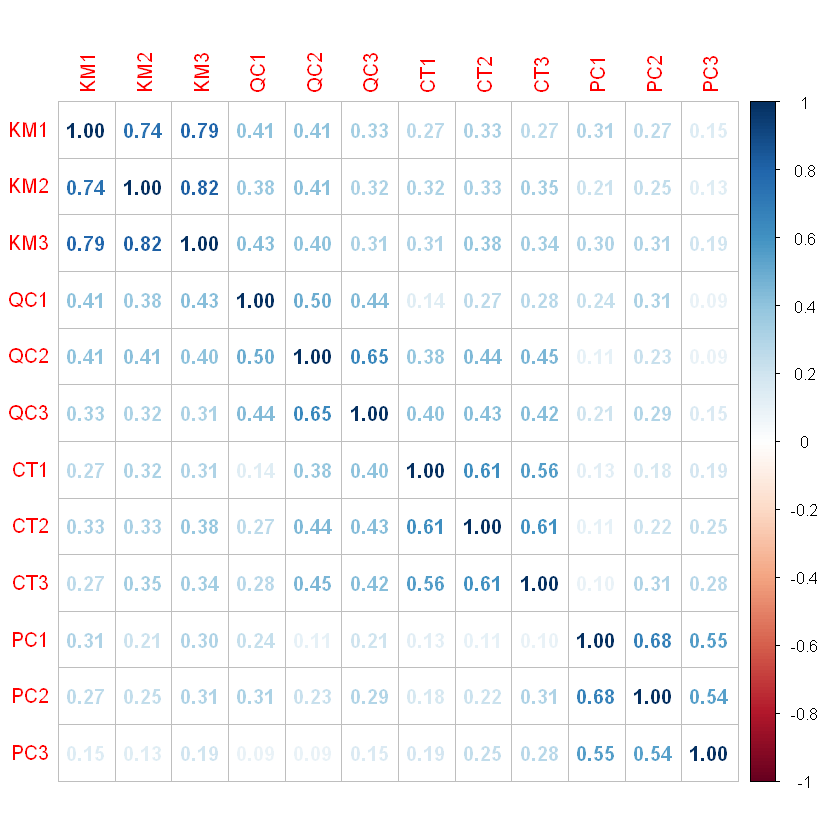

In [6]:
datamatrix <- cor(dat[,c(-13)])
corrplot(datamatrix, method="number")

In [7]:
X <- dat[,-c(13)]
Y <- dat[,13]

In [8]:
KMO(r=cor(X))

Kaiser-Meyer-Olkin factor adequacy
Call: KMO(r = cor(X))
Overall MSA =  0.83
MSA for each item = 
 KM1  KM2  KM3  QC1  QC2  QC3  CT1  CT2  CT3  PC1  PC2  PC3 
0.87 0.84 0.82 0.88 0.86 0.86 0.83 0.85 0.85 0.70 0.78 0.80 

In [9]:
cortest.bartlett(X)

R was not square, finding R from data



$chisq
[1] 1595.75

$p.value
[1] 8.846246e-290

$df
[1] 66

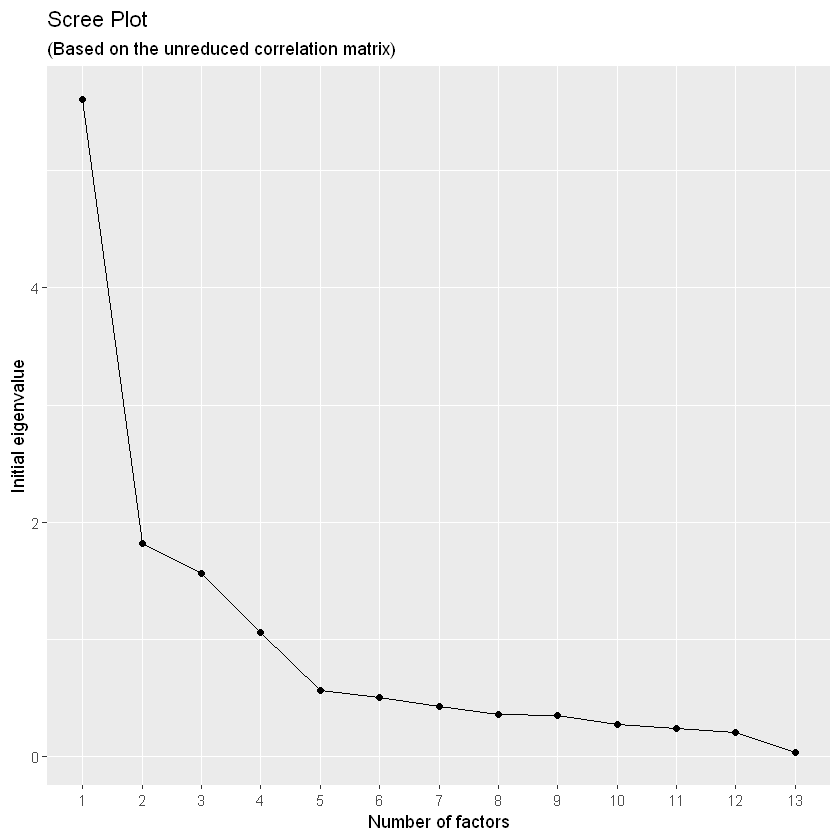

In [10]:
fafitfree <- fa(dat,nfactors = ncol(X), rotate = "none")
n_factors <- length(fafitfree$e.values)
scree     <- data.frame(
  Factor_n =  as.factor(1:n_factors), 
  Eigenvalue = fafitfree$e.values)
ggplot(scree, aes(x = Factor_n, y = Eigenvalue, group = 1)) + 
  geom_point() + geom_line() +
  xlab("Number of factors") +
  ylab("Initial eigenvalue") +
  labs( title = "Scree Plot", 
        subtitle = "(Based on the unreduced correlation matrix)")

In [11]:
fa.var <- fa(r=cor(X), nfactors = 4, covar = FALSE, fm="pa", max.iter=100, rotate
             ="varimax") 


print(fa.var)

Factor Analysis using method =  pa
Call: fa(r = cor(X), nfactors = 4, rotate = "varimax", covar = FALSE, 
    max.iter = 100, fm = "pa")
Standardized loadings (pattern matrix) based upon correlation matrix
     PA1   PA3  PA2   PA4   h2   u2 com
KM1 0.80  0.13 0.15  0.24 0.73 0.27 1.3
KM2 0.82  0.22 0.08  0.20 0.76 0.24 1.3
KM3 0.88  0.21 0.17  0.18 0.88 0.12 1.3
QC1 0.31  0.06 0.16  0.56 0.43 0.57 1.8
QC2 0.23  0.34 0.01  0.74 0.71 0.29 1.6
QC3 0.13  0.35 0.13  0.66 0.59 0.41 1.7
CT1 0.15  0.72 0.08  0.14 0.56 0.44 1.2
CT2 0.19  0.75 0.10  0.21 0.65 0.35 1.3
CT3 0.15  0.69 0.15  0.25 0.59 0.41 1.5
PC1 0.18 -0.03 0.82  0.10 0.71 0.29 1.1
PC2 0.13  0.11 0.78  0.22 0.68 0.32 1.3
PC3 0.04  0.23 0.67 -0.03 0.51 0.49 1.2

                       PA1  PA3  PA2  PA4
SS loadings           2.38 1.97 1.86 1.60
Proportion Var        0.20 0.16 0.16 0.13
Cumulative Var        0.20 0.36 0.52 0.65
Proportion Explained  0.30 0.25 0.24 0.20
Cumulative Proportion 0.30 0.56 0.80 1.00

Mean item complexity